<a href="https://colab.research.google.com/github/cerenimii/PROJE1/blob/main/tezuygulama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kredi Kartı Dolandırıcılık Tespitinde Dengesiz Veri Problemi İçin SMOTE ve Türevlerinin  Karşılaştırmalı Performans Değerlendirmesi**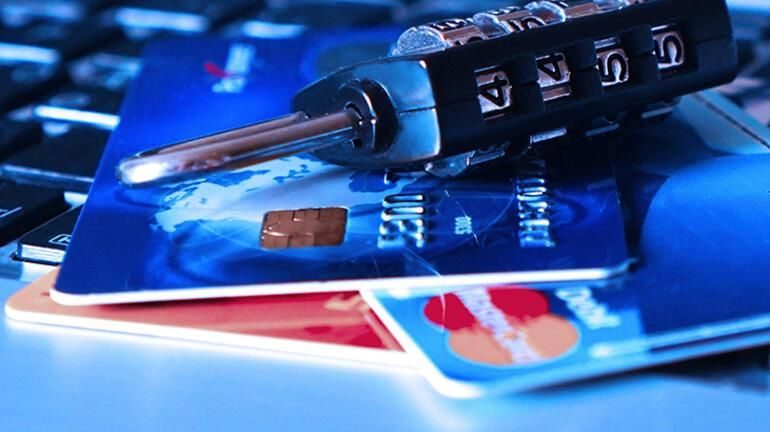

# **1.Adım: Veri Hazırlığı ve Keşifçi Veri Analizi(EDA)**

In [33]:
# Kullanılacak Kütüphanelerin Yüklenmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
# Hatalarda uyarı vermesi için kullanılır.
import warnings
warnings.filterwarnings('ignore')





In [34]:
# Veri Setinin Yüklenmesi

url = "https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv"
df = pd.read_csv(url)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [35]:
#veri setindeki satır ve sütün sayısı
df.shape
#Bu veri seti 284807 satır 31 sütündan oluşuyor.

(284807, 31)

In [36]:
#veri setindeki sütunlar
df.columns
df.columns.tolist()   # liste şeklinde verir sütün adlarını

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

# Veri setindeki sütunlar şu şekilde ifade edilir:

- V1, V2, V3, ... V28 : Principal Component Analysis (PCA) ile dönüştürülmüş gizli özellikler
> Gerçek kredi kartı numaraları ,isimler gibi hassas bilgiler gizlilik nedeniyle kamufule edilmiştir.
- Time:
> İşlemin yapıldığı zamanı gösteriyor.işlemin başladığı süreden belli saniye cinsinden veriyor.
- Amount:
> İşlem tutarı anlamına gelir.Parasal değeri verir farklı para birimlerini ifade edebilir.
-Class:
> Hedef değişken(dolandırıcılık durumu) anlamına gelir.
0: Normal işlem
1: Dolandırıcılık işlem

In [37]:
# Sütün adlarının daha iyi anlaşılabilmesi için adlarının değiştirilmesi işlemi
df.rename(columns={"Time":"İşlem Süresi","Amount":"İşlem Miktarı"},inplace=True)
df.columns


Index(['İşlem Süresi', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'İşlem Miktarı', 'Class'],
      dtype='object')

In [38]:
# Satır numaralarının yapısının belirlenmesi işlemi
df.index


RangeIndex(start=0, stop=284807, step=1)

Çıktının sonucunda start=0 bize index numaralarının 0 dan başladığını gösteriyor.Stop=284807 index numaraları 284806'da bitiyor.(stop değeri dahil değildir.), Step=1 her satır arasında birer artış olduğunu gösteriyor.
Toplam satır sayısı: 284,807

In [39]:
# Sütün adlarını ,tiplerini eksik verileri bize veriyor.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   İşlem Süresi   284807 non-null  float64
 1   V1             284807 non-null  float64
 2   V2             284807 non-null  float64
 3   V3             284807 non-null  float64
 4   V4             284807 non-null  float64
 5   V5             284807 non-null  float64
 6   V6             284807 non-null  float64
 7   V7             284807 non-null  float64
 8   V8             284807 non-null  float64
 9   V9             284807 non-null  float64
 10  V10            284807 non-null  float64
 11  V11            284807 non-null  float64
 12  V12            284807 non-null  float64
 13  V13            284807 non-null  float64
 14  V14            284807 non-null  float64
 15  V15            284807 non-null  float64
 16  V16            284807 non-null  float64
 17  V17            284807 non-nul

In [40]:
# Her sütunun veri tipi
df.dtypes

,0
İşlem Süresi,float64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


In [41]:
#Eksik Veri Analizi
missing_data=df.isnull().sum()
print(f"Eksik Veri Analizi:\n{missing_data}")




Eksik Veri Analizi:
İşlem Süresi     0
V1               0
V2               0
V3               0
V4               0
V5               0
V6               0
V7               0
V8               0
V9               0
V10              0
V11              0
V12              0
V13              0
V14              0
V15              0
V16              0
V17              0
V18              0
V19              0
V20              0
V21              0
V22              0
V23              0
V24              0
V25              0
V26              0
V27              0
V28              0
İşlem Miktarı    0
Class            0
dtype: int64


# **Bu çıktılar doğrultusunda :**

VERİ SETİNİN ÖZELLİKLERİ:

1. GENEL YAPISI:
  > - Toplam kayıt: 284,807 kredi kartı işlemi
   >- Özellik sayısı: 31 sütun (30 bağımsız, 1 bağımlı(Hedef değişken))
   >- Veri bütünlüğü:Güzel(hiç eksik veri yok)

2. ÖZELLİK TİPLERİ:
   >- Sayısal özellikler: 30 adet float64 (V1-V28, İşlem Süresi, İşlem Miktarı)
   >- Hedef değişken: 1 adet int64 (Class: 0=Normal, 1=Sahtekarlık)

3. BELLEK KULLANIMI:
   >- Toplam: 67.4 MB - veri işleme için uygun boyut

4. VERİ KALİTESİ:
   >- Eksik veri: YOK
   >- Tutarsızlık: YOK
   >- Temizlik gereksinimi: AZ

In [42]:
# Veri Setinin Sayısal Değişken Özeti
df.describe()
#df.describe().T  Transpozu alınmış hali

,İşlem Süresi,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,İşlem Miktarı,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


| İstatistik      | Açıklama                      |
| --------------- | ----------------------------- |
| count           | Eksik olmayan gözlem sayısı   |
| mean            | Aritmetik ortalama            |
| std             | Standart sapma                |
| min / max       | En küçük ve büyük değerler    |
| 25% / 50% / 75% | Çeyrek değerler, medyan dahil |


Çarpıklık (Skewness): Ortalama > Medyan → Sağa çarpık dağılım. Tersi sola çarpık.

İstatiksel Analiz Tablosunda bakıldığında  mean(ortalama) değerleri 0 a çok yakın değerler alırken std(standart sapma) değerleri 1 e yakın değer alıyor.Buda V1-V28 için daha önceden standardize edildiğini gösteriyor.

In [43]:
# Hedef değişken istatistikleri
"""
count         284807.000000
mean          0.001727  # Sahtekarlık oranı: %0.1727
std           0.041527  # Düşük std = dengesiz veri
min           0.000000
25%           0.000000  # %25'lik dilim: 0
50%           0.000000  # Medyan: 0
75%           0.000000  # %75'lik dilim: 0
max           1.000000  # Maksimum: 1
"""

"\ncount         284807.000000\nmean          0.001727  # Sahtekarlık oranı: %0.1727\nstd           0.041527  # Düşük std = dengesiz veri\nmin           0.000000\n25%           0.000000  # %25'lik dilim: 0\n50%           0.000000  # Medyan: 0\n75%           0.000000  # %75'lik dilim: 0\nmax           1.000000  # Maksimum: 1\n"

In [44]:
# Aykırı Değer(Outlier) Analizi
#QR yöntemi ile aykırı değer tespiti
Q1 = df['İşlem Süresi'].quantile(0.25)
Q3 = df['İşlem Süresi'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df[(df['İşlem Süresi'] < lower_bound) | (df['İşlem Süresi'] > upper_bound)]
print(f"{'işlem Süresi'}: {len(outliers_iqr)} aykırı değer")


işlem Süresi: 0 aykırı değer


In [45]:
Q1=df['İşlem Miktarı'].quantile(0.25)
Q3=df['İşlem Miktarı'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5-IQR
upper_bound=Q3+1.5*IQR

outliers_iqr=df[(df['İşlem Miktarı']<lower_bound)|(df['İşlem Miktarı']>upper_bound)]
print(f"{'İşlem Miktarı'}: {len(outliers_iqr)} aykırı değer")

İşlem Miktarı: 31904 aykırı değer


İşlem Miktarı ve İşlem Süresi verilerinde aykırı değer olması normaldir.Gerçek dünya verisi oldukları için Bu aşamadan sonra class  değişkenine aykırı değer analizi yapmamıza gerek yoktur.Çünkü binary değişkendir.

In [46]:
Q1=df['V23'].quantile(0.25)
Q3=df['V23'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5-IQR
upper_bound=Q3+1.5*IQR

outliers_iqr=df[(df['V23']<lower_bound)|(df['V23']>upper_bound)]
print(f"{'V23'}: {len(outliers_iqr)} aykırı değer")

V23: 11712 aykırı değer


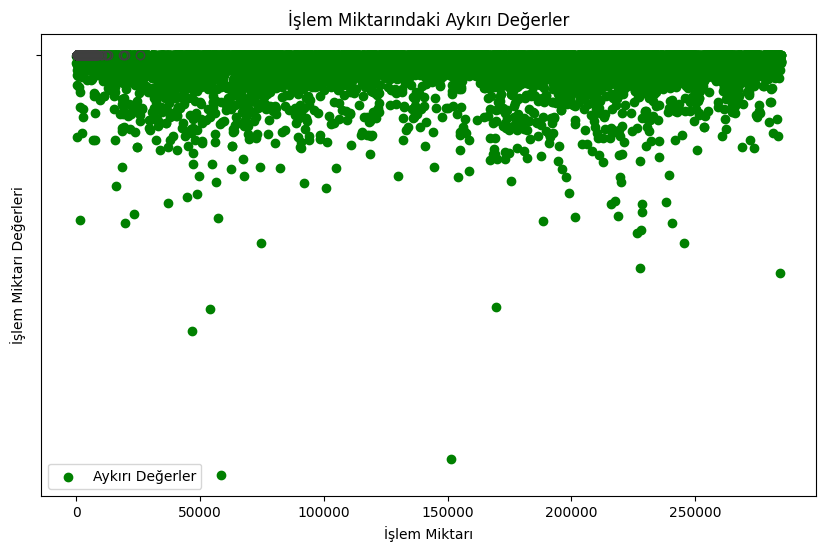

In [47]:
# Aykırı Değerleri  daha iyi anlayabilmemiz için görselleşitirme işlemi
plt.figure(figsize=(10,6))
sns.boxplot(x=df['İşlem Miktarı'])
plt.scatter(outliers_iqr.index,outliers_iqr['İşlem Miktarı'],color='green',label='Aykırı Değerler')
plt.legend()
plt.ylabel('İşlem Miktarı Değerleri')
plt.xlabel('İşlem Miktarı')
plt.title('İşlem Miktarındaki Aykırı Değerler')
plt.show()


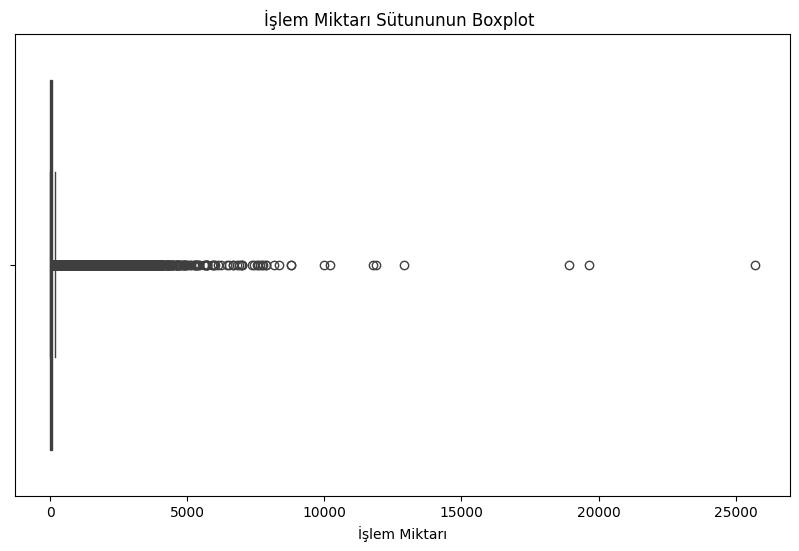

işlem Miktarının Medyan Değeri: 22.0


In [48]:
# İşlem Miktarı sütununu boxplot ile  görselleştirme işlemi
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['İşlem Miktarı'])
plt.title('İşlem Miktarı Sütununun Boxplot ')
plt.xlabel('İşlem Miktarı')
plt.show()
medyan=df['İşlem Miktarı'].median()
print(f'işlem Miktarının Medyan Değeri: {medyan}')

# **Grafiklerin yorumu :**
Dağılım hakkında şunlar söylenebilir:
- Sağa çarpık bir dağılım vardır.
- Aykırı değerler üst sınırın üzerinde yoğunlaşmıştır.
- Medyan değeri 15.95 dir.

# Aykırı Değerleri İşleme
Bu işlemi gerçekleştirmek için 3 farklı yöntem vardır.
- KIRPMA (CLIPPING/CAPPING)
- LOG DÖNÜŞÜMÜ
- KALDIRMA (REMOVAL)


In [49]:
# Aykırı değerleri sınırlandırma işlemi (capping)
df['İşlemMiktarı_capped'] = df['İşlem Miktarı'].clip(lower=lower_bound, upper=upper_bound)
df[['İşlem Miktarı', 'İşlemMiktarı_capped']].describe()


#clip() fonksiyonu belirlediğimiz alt ve üst sınırlara göre aykırı değerleri kırpar.
#lower_bound alt sınırın altındaki tüm değerleri alt sınıra eşitler.
#upper_bound üst sınırın üstündeki tüm değerleri üst sınıra eşitler.
#describe() fonksiyonu şu istatistikleri verir:

#count (gözlem sayısı)
#mean (ortalama)
#std (standart sapma)
#min (minimum)
#25%, 50%, 75% (çeyreklikler)
#max (maksimum)




,İşlem Miktarı,İşlemMiktarı_capped
count,284807.000000,284807.000000
mean,88.349619,0.605167
std,250.120109,0.062022
min,0.000000,0.000000
25%,5.600000,0.611875
50%,22.000000,0.611875
75%,77.165000,0.611875
max,25691.160000,0.611875


In [50]:
# AYKIRI DEĞER İŞLEME FONKSİYONU
def handle_creditcard_outliers_final(df):


    df_clean = df.copy()

    # 1. İşlem Miktarı için LOG DÖNÜŞÜMÜ
    df_clean['Amount_Log'] = np.log1p(df_clean['İşlem Miktarı'])

    # 2. Log dönüşümü sonrası HAFFİF KIRPMA (sadece aşırı uçlar için)
    Q1_log = df_clean['Amount_Log'].quantile(0.01)
    Q3_log = df_clean['Amount_Log'].quantile(0.99)
    IQR_log = Q3_log - Q1_log
    lower_bound_log = Q1_log - 3 * IQR_log  # 3x IQR (daha toleranslı)
    upper_bound_log = Q3_log + 3 * IQR_log

    df_clean['Amount_Log'] = np.clip(df_clean['Amount_Log'], lower_bound_log, upper_bound_log)

    # 3. Orijinal İşlem Miktarı sütununu kaldırılması
    df_clean = df_clean.drop('İşlem Miktarı', axis=1)

    # 4. V1-V28 değişkenlerini yapmaya gerek yok. (Zaten PCA ile standardize)

    print(" AYKIRI DEĞER İŞLEME TAMAMLANDI!")
    print(f"   - Yeni boyut: {df_clean.shape}")

    return df_clean
df_processed = handle_creditcard_outliers_final(df)




 AYKIRI DEĞER İŞLEME TAMAMLANDI!
   - Yeni boyut: (284807, 32)


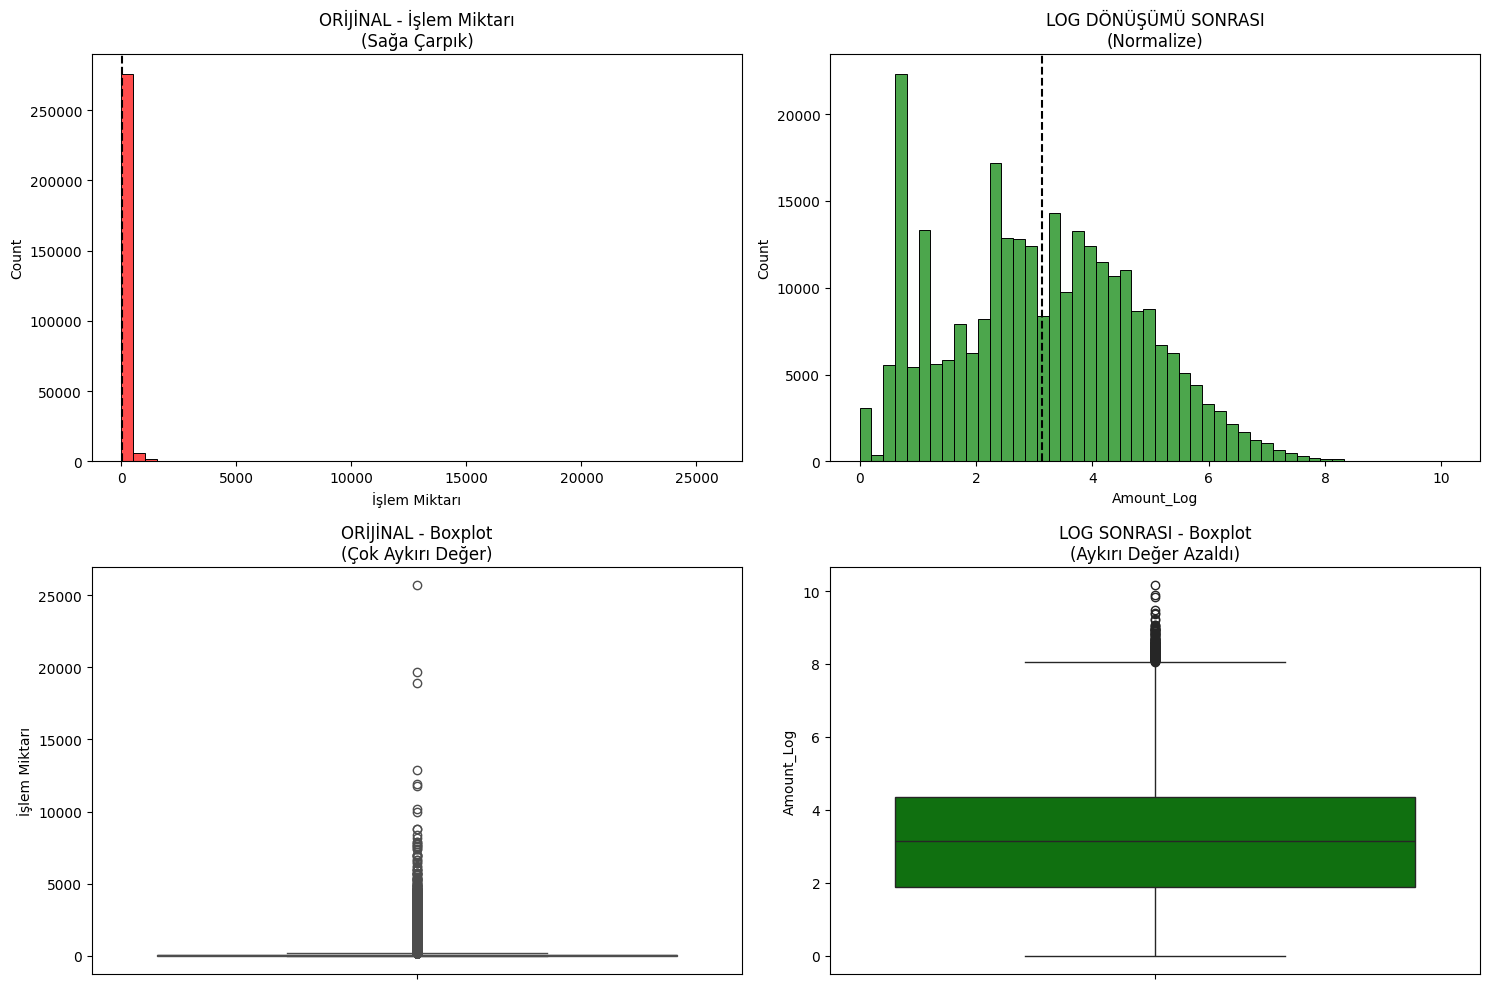

In [51]:
# Görsel karşılaştırma
def visualize_comparison(df_original, df_processed):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Orijinal İşlem Miktarı
    sns.histplot(df_original['İşlem Miktarı'], ax=axes[0,0], bins=50, color='red', alpha=0.7)
    axes[0,0].set_title('ORİJİNAL - İşlem Miktarı\n(Sağa Çarpık)')
    axes[0,0].axvline(df_original['İşlem Miktarı'].median(), color='black', linestyle='--', label='Medyan')

    # Log dönüşümü sonrası
    sns.histplot(df_processed['Amount_Log'], ax=axes[0,1], bins=50, color='green', alpha=0.7)
    axes[0,1].set_title('LOG DÖNÜŞÜMÜ SONRASI\n(Normalize)')
    axes[0,1].axvline(df_processed['Amount_Log'].median(), color='black', linestyle='--', label='Medyan')

    # Orijinal Boxplot
    sns.boxplot(y=df_original['İşlem Miktarı'], ax=axes[1,0], color='red')
    axes[1,0].set_title('ORİJİNAL - Boxplot\n(Çok Aykırı Değer)')

    # Log Boxplot
    sns.boxplot(y=df_processed['Amount_Log'], ax=axes[1,1], color='green')
    axes[1,1].set_title('LOG SONRASI - Boxplot\n(Aykırı Değer Azaldı)')

    plt.tight_layout()
    plt.show()

# Görselleştirmeyi çalıştırma
visualize_comparison(df, df_processed)

In [52]:
# Korelasyon Analizi
from scipy.stats import  pointbiserialr
# Değişkenler için pearson korelasyonu
corr_matrix=df[['İşlem Miktarı','İşlem Süresi','Class']].corr(method='pearson')
corr_matrix


,İşlem Miktarı,İşlem Süresi,Class
İşlem Miktarı,1.000000,-0.010596,0.005632
İşlem Süresi,-0.010596,1.000000,-0.012323
Class,0.005632,-0.012323,1.000000


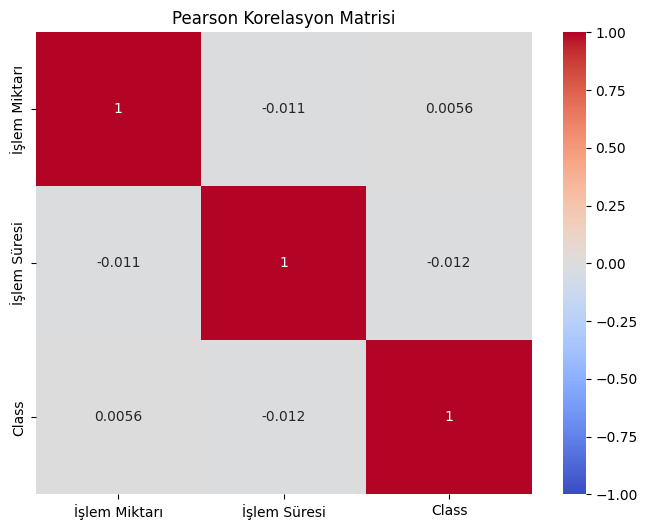

In [53]:
# Korelasyon Matrisini Görselleştirme
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',vmin=-1,vmax=1,mask=None)
plt.title('Pearson Korelasyon Matrisi')
plt.show()

# Korelasyon Analizi Yorumu
**1- Class ve İşlem Miktarı Arasında = 0,004277**
> Nerdeyse sıfır korelasyon , dolandırıcılık (class) ile işlem miktarı arasında lineer ilişki yoktur.Buda bize dolandırıcılığın sadece yüksek tutarlı işlemlerde gerçekleşmediğini gösteriyor.

**2-Class ve İşlem Süresi Arasında =0.04352**
> Çok düşük korelasyon söz konusudur.Belirli saatlerde dolandırıcılık biraz daha yüksek olabilmektedir.

**3-İşlem Miktarı ve İşlem Süresi Arasında= -0,018037**
> Negatif ve çok düşük korelasyon söz konusudur.

"Korelasyon analizi sonucunda, dolandırıcılık(class) ile işlem miktarı ve zamanı arasında anlamlı bir lineer ilişki bulunamamıştır. Bu durum, dolandırıcılık tespitinin kompleks ve non-lineer modelleri gerektirdiğini göstermektedir."



# **2.Adım:Makine Öğrenmesi Modellerinin Uygulanması**

In [54]:
# Kullanılacak kütüphanenin İmport edilmesi
from sklearn.model_selection import train_test_split

# Feature ve Target(hedef) değişkenlerin belirlenmesi
X= df_processed.drop('Class',axis=1)  # tüm featur'lar
y= df_processed['Class']   # Hedef değişken

# Eğitim ve Test Verisine  Ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)  # Burada sınıf dağılımını korumak için stratify kullandık.


# Genellikle %80 eğitim  % 20 test olarak ayırırız.

In [55]:
# Split işlemi Sonrası kontrol
print("SPLIT SONUÇLARI")
print(f"Toplam veri: {len(X)}")
print(f"Eğitim seti: {X_train.shape} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test seti: {X_test.shape} ({len(X_test)/len(X)*100:.1f}%)")
print(f"Eğitim seti fraud: {y_train.sum()} (%{y_train.mean()*100:.4f})")   # Dolandırcılık kısmı eğitim seti kısmı
print(f"Test seti fraud: {y_test.sum()} (%{y_test.mean()*100:.4f})")       # Dolandırcılık kısmı  Test seti kısmı

# Sonuç olarak eğitim veri setimizde

SPLIT SONUÇLARI
Toplam veri: 284807
Eğitim seti: (227845, 31) (80.0%)
Test seti: (56962, 31) (20.0%)
Eğitim seti fraud: 394 (%0.1729)
Test seti fraud: 98 (%0.1720)


In [56]:
# Kütüphanelerin tanımlanması işlemi
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)   # sadece eğitim veri setine uyguluyoruz.

print("SMOTE SONUÇLARI")
print(f"SMOTE ÖNCESİ - Eğitim seti: {X_train.shape}")
print(f"SMOTE ÖNCESİ - Fraud sayısı: {y_train.sum()} (Oran: %{y_train.mean()*100:.3f})")  # SMOTE öncesi dolandırıcılık sayısı

print(f"SMOTE SONRASI - Eğitim seti: {X_train_smote.shape}")
print(f"SMOTE SONRASI - Fraud sayısı: {y_train_smote.sum()} (Oran: %{y_train_smote.mean()*100:.3f})")  # SMOTE sonrası dolandırıcılık sayısı

print(f"Test seti (DEĞİŞMEDİ): {X_test.shape}")
print(f"Test seti fraud: {y_test.sum()} (Oran: %{y_test.mean()*100:.3f})")

SMOTE SONUÇLARI
SMOTE ÖNCESİ - Eğitim seti: (227845, 31)
SMOTE ÖNCESİ - Fraud sayısı: 394 (Oran: %0.173)
SMOTE SONRASI - Eğitim seti: (454902, 31)
SMOTE SONRASI - Fraud sayısı: 227451 (Oran: %50.000)
Test seti (DEĞİŞMEDİ): (56962, 31)
Test seti fraud: 98 (Oran: %0.172)


In [57]:
# Hibrit yöntemin veri setine uygulanması işlemi
# kullanılacak kütüphaneler tanımlandı
import pandas as pd
import numpy as np
from collections import Counter
from imblearn.over_sampling import ADASYN, BorderlineSMOTE
from sklearn.model_selection import train_test_split

class CorrectHybridSampler:
    def __init__(self, random_state=42):
        self.random_state = random_state  # rastgelelik sabitlmek için  yazdık bu kodu

    def fit_resample(self, X, y):
        class_counts = Counter(y)  #sınıf dağılımını sayar
        n_fraud = class_counts[1]   # dolandırıcılık sayısı
        n_normal = class_counts[0]   # normal işlem sayısı

        # HEDEF: %10-20 dolandırıcılık oranı
        target_fraud = int(n_normal * 0.1)  # %10 oran
        needed_samples = target_fraud - n_fraud

        print(f"Orijinal: Normal={n_normal}, Dolandırıcılık={n_fraud}")
        print(f"Hedef dolandırıcılık: {target_fraud}")
        print(f"Üretilmesi gereken: {needed_samples}")

        if needed_samples <= 0:
            print("Örnekleme gerekmiyor!")
            return X, y

        n_adasyn = needed_samples // 2   #ADASYN Yöntemi ile yarısını üretilmesi
        n_borderline = needed_samples - n_adasyn # kalanını boderline ile üretmek

        print(f"ADASYN ile: {n_adasyn}, Borderline ile: {n_borderline}")

         # ADASYN ile örnek üretmek (Zor bölgelerde daha fazla örnek üretir)
        X_adasyn, y_adasyn = ADASYN(
            sampling_strategy={1: n_fraud + n_adasyn},
            random_state=self.random_state
        ).fit_resample(X, y)

        # Borderline-SMOTE ile örnek üretmek (sınıf sınırındaki önemli örnekleri çoğaltır)

        X_borderline, y_borderline = BorderlineSMOTE(
            sampling_strategy={1: n_fraud + n_borderline},
            random_state=self.random_state
        ).fit_resample(X, y)

        # Yeni örneklerin birleştirilmesi
        X_adasyn_new = X_adasyn[len(X):]
        y_adasyn_new = y_adasyn[len(y):]

        X_borderline_new = X_borderline[len(X):]
        y_borderline_new = y_borderline[len(y):]

        # Birleştirme
        X_final = np.vstack([X, X_adasyn_new, X_borderline_new])
        y_final = np.hstack([y, y_adasyn_new, y_borderline_new])

        print(f"Hybrid sonrası: Normal={Counter(y_final)[0]}, Dolandırıcılık={Counter(y_final)[1]}")
        print(f"Toplam örnek: {len(y_final)}")
        print(f"Yeni dolandırıcılık oranı: {Counter(y_final)[1]/len(y_final):.3f}")

        return X_final, y_final

# Veri setimizin tekrar yüklenmesi ve  bölünmesi işlemi
url = "https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv"
df = pd.read_csv(url)

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("EĞİTİM SETİ DAĞILIMI:", Counter(y_train))

# Düzeltilmiş hibrit yöntem
hybrid_sampler = CorrectHybridSampler(random_state=42)
X_hybrid, y_hybrid = hybrid_sampler.fit_resample(X_train, y_train)

EĞİTİM SETİ DAĞILIMI: Counter({0: 227451, 1: 394})
Orijinal: Normal=227451, Dolandırıcılık=394
Hedef dolandırıcılık: 22745
Üretilmesi gereken: 22351
ADASYN ile: 11175, Borderline ile: 11176
Hybrid sonrası: Normal=227451, Dolandırıcılık=22759
Toplam örnek: 250210
Yeni dolandırıcılık oranı: 0.091
